# Supplementary figure 1: Coverage plots

June 6, 2019

This notebook contains code for producing coverage plots. I have plotted the mean and standard deviation coverage for each site in the genome when averaging across all 13 samples (human and duck). 

In [1]:
import sys, subprocess, glob, os, shutil, re, importlib
from subprocess import call
from Bio import SeqIO
from Bio.Seq import Seq
from Bio import AlignIO
import pandas as pd
import statistics
import rpy2
%load_ext rpy2.ipython

In [2]:
# read in pileup files
pileups = []
for f in glob.glob("../data/pileup-files/*"):
    pileups.append(f)
print(len(pileups))

13


In [3]:
coverages = {}
coverage_means = {}

for p in pileups: 
    with open(p, "r") as infile: 
        count = 0
        
        for line in infile: 
            count += 1
            header = line.split("\t")[0]
            sample = "/".join(header.split("_")[1:-1])
            gene = "".join(header.split("_")[-1:])
            site = line.split("\t")[1]
            coverage = int(line.split("\t")[3])
            
            if sample not in coverages: 
                coverages[sample] = {}
            if gene not in coverages[sample]:
                coverages[sample][gene] = []
            if gene in coverages[sample]: 
                coverages[sample][gene].append(coverage)
    
#print(coverages)   
    coverage_means[sample] = {}
    for gene in coverages[sample]:
        mean = float(sum(coverages[sample][gene]))/len(coverages[sample][gene])
        stdev = float(statistics.stdev(coverages[sample][gene]))
        
        coverage_means[sample][gene] = {}
        coverage_means[sample][gene]["mean"] = mean
        coverage_means[sample][gene]["stdev"] = stdev

In [4]:
df = pd.DataFrame.from_dict(coverage_means, orient="columns")
df

,A/CAMBODIA/V0401301/2011,A/CAMBODIA/V0417301/2011,A/Cambodia/W0112303/2012,A/Cambodia/X0125302/2013,A/Cambodia/X0128304/2013,A/Cambodia/X0207301/2013,A/Cambodia/X0219301/2013,A/Cambodia/X1030304/2013,A/duck/Cambodia/083D1/2011,A/duck/Cambodia/381W11M4/2013,A/duck/Cambodia/PV027D1/2010,A/duck/Cambodia/Y0224301/2014,A/duck/Cambodia/Y0224304/2014
H5,"{'mean': 183.82122260668973, 'stdev': 134.9547...","{'mean': 175.71997656707674, 'stdev': 78.69992...","{'mean': 159.1923515981735, 'stdev': 71.591295...","{'mean': 78.80205949656751, 'stdev': 35.208069...","{'mean': 229.08911449520588, 'stdev': 97.76228...","{'mean': 172.25190392501466, 'stdev': 69.36144...","{'mean': 80.74651972157773, 'stdev': 24.927314...","{'mean': 274.7527826596368, 'stdev': 132.97923...","{'mean': 239.8465909090909, 'stdev': 76.957393...","{'mean': 221.34212067955477, 'stdev': 55.99762...","{'mean': 215.46276293348492, 'stdev': 68.71853...","{'mean': 203.88810779144697, 'stdev': 62.73540...","{'mean': 209.59122006841505, 'stdev': 75.35279..."
MP,"{'mean': 303.6952288218111, 'stdev': 116.55080...","{'mean': 306.2413793103448, 'stdev': 116.35117...","{'mean': 302.68062317429406, 'stdev': 114.1490...","{'mean': 337.6394088669951, 'stdev': 123.55711...","{'mean': 282.0759493670886, 'stdev': 97.782808...","{'mean': 312.7120470127326, 'stdev': 119.61968...","{'mean': 307.4733727810651, 'stdev': 117.81183...","{'mean': 323.50194931773876, 'stdev': 121.1072...","{'mean': 276.6756487025948, 'stdev': 89.439868...","{'mean': 253.07722772277228, 'stdev': 81.51758...","{'mean': 258.6630963972736, 'stdev': 85.566267...","{'mean': 270.1986234021632, 'stdev': 87.293095...","{'mean': 305.05226824457594, 'stdev': 97.01337..."
N1,"{'mean': 304.2348703170029, 'stdev': 101.22469...","{'mean': 302.92909356725147, 'stdev': 89.54709...","{'mean': 310.45500359971203, 'stdev': 102.7331...","{'mean': 318.04413892908826, 'stdev': 98.58065...","{'mean': 296.6331403762663, 'stdev': 93.673694...","{'mean': 317.6450184501845, 'stdev': 89.358307...","{'mean': 315.2972582972583, 'stdev': 97.545729...","{'mean': 297.7859237536657, 'stdev': 81.437855...","{'mean': 272.92554744525546, 'stdev': 60.55202...","{'mean': 209.87028985507246, 'stdev': 48.75882...","{'mean': 217.60361010830326, 'stdev': 54.75955...","{'mean': 267.42162554426704, 'stdev': 73.16024...","{'mean': 238.35264301230993, 'stdev': 76.08532..."
NP,"{'mean': 308.6030483764082, 'stdev': 95.701892...","{'mean': 318.7283950617284, 'stdev': 94.964282...","{'mean': 312.568284789644, 'stdev': 95.9284229...","{'mean': 306.77433913604125, 'stdev': 92.64977...","{'mean': 263.5327342747112, 'stdev': 100.27784...","{'mean': 310.9020618556701, 'stdev': 90.840509...","{'mean': 308.675884244373, 'stdev': 94.7443034...","{'mean': 301.1545454545454, 'stdev': 94.136474...","{'mean': 242.06878650227125, 'stdev': 60.65071...","{'mean': 205.98704663212436, 'stdev': 56.00401...","{'mean': 243.12597402597402, 'stdev': 63.65726...","{'mean': 249.77792207792209, 'stdev': 67.52731...","{'mean': 223.83387835186397, 'stdev': 56.01667..."
NS,"{'mean': 266.86285714285714, 'stdev': 119.6300...","{'mean': 272.6928487690504, 'stdev': 122.20650...","{'mean': 264.26254375729286, 'stdev': 119.3157...","{'mean': 303.02552204176334, 'stdev': 126.8074...","{'mean': 286.9097142857143, 'stdev': 99.724861...","{'mean': 248.42198581560282, 'stdev': 109.0105...","{'mean': 260.1430303030303, 'stdev': 109.27621...","{'mean': 310.85058823529414, 'stdev': 125.8542...","{'mean': 268.2782909930716, 'stdev': 97.787760...","{'mean': 233.52927669345578, 'stdev': 83.41295...","{'mean': 232.1209677419355, 'stdev': 88.987695...","{'mean': 263.0208333333333, 'stdev': 94.465659...","{'mean': 302.46514285714284, 'stdev': 110.4690..."
PA,"{'mean': 293.8260473588342, 'stdev': 69.629738...","{'mean': 330.770130454341, 'stdev': 84.4117931...","{'mean': 323.70480035890535, 'stdev': 85.07515...","{'mean': 309.2011674898967, 'stdev': 76.660005...","{'mean': 238.72637707120467, 'stdev': 75.40469

In [5]:
# do it instead by site now

coverages = {}
coverage_means = {}

for p in pileups: 
    with open(p, "r") as infile: 
        count = 0
        
        for line in infile: 
            count += 1
            header = line.split("\t")[0]
            sample = "/".join(header.split("_")[1:-1])
            gene = "".join(header.split("_")[-1:])
            site = line.split("\t")[1]
            coverage = int(line.split("\t")[3])
            
            if gene not in coverages: 
                coverages[gene] = {}
            if site not in coverages[gene]:
                coverages[gene][site] = []
            if site in coverages[gene]:
                coverages[gene][site].append(coverage)

In [6]:
# print out the maximum site in each gene for this dataset
for gene in coverages:
    sites = []
    for site in coverages[gene]:
        sites.append(int(site))
    print(gene, max(sites))

H5 1773
MP 1027
N1 1389
NP 1558
NS 875
PA 2233
PB1 2341
PB2 2341


In [7]:
coverage_means = {}
coverage_stdevs = {}

for gene in coverages: 
    coverage_means[gene] = {}
    coverage_stdevs[gene] = {}
    
    for site in coverages[gene]:
        if len(coverages[gene][site])  < 13:
            extras = 11 - len(coverages[gene][site])
            for i in range(extras):
                coverages[gene][site].append(0)
            
        mean = float(sum(coverages[gene][site]))/len(coverages[gene][site])
        stdev = float(statistics.stdev(coverages[gene][site]))
        
        coverage_means[gene][site] = mean
        coverage_stdevs[gene][site] = stdev

In [8]:
print(len(coverage_means), len(coverage_stdevs))

8 8


In [9]:
meansdf = pd.DataFrame.from_dict(coverage_means, orient="columns")
stdevsdf = pd.DataFrame.from_dict(coverage_stdevs, orient="columns")
meansdf.reset_index(inplace=True)
stdevsdf.reset_index(inplace=True)
meansdf.head()

,index,H5,MP,N1,NP,NS,PA,PB1,PB2
0,1,0.307692,0.615385,0.615385,3.461538,1.230769,1.000000,0.727273,0.692308
1,2,3.230769,4.384615,4.307692,7.846154,4.769231,4.500000,3.181818,3.538462
2,3,5.923077,8.923077,7.000000,10.000000,9.307692,8.750000,6.363636,6.615385
3,4,7.538462,10.538462,9.461538,10.923077,10.384615,9.846154,7.727273,7.692308
4,5,8.461538,12.076923,10.153846,12.153846,12.230769,11.384615,8.818182,8.461538


In [10]:
meansdf = meansdf.melt(id_vars="index")
stdevsdf = stdevsdf.melt(id_vars="index")
meansdf = meansdf.rename(columns={'value':'mean', 'variable':'gene', 'index':'site'})
stdevsdf = stdevsdf.rename(columns={'value':'stdev', 'variable':'gene', 'index':'site'})
meansdf.head()

,site,gene,mean
0,1,H5,0.307692
1,2,H5,3.230769
2,3,H5,5.923077
3,4,H5,7.538462
4,5,H5,8.461538


In [11]:
# merge together
df = pd.merge(meansdf,stdevsdf, on=['site','gene'])
df['site'] = pd.to_numeric(df['site'])
df['upper'] = df['mean'] + df['stdev']
df['lower'] = df['mean'] - df['stdev']
df.head()

,site,gene,mean,stdev,upper,lower
0,1,H5,0.307692,0.480384,0.788077,-0.172692
1,2,H5,3.230769,3.811252,7.042021,-0.580483
2,3,H5,5.923077,3.729646,9.652723,2.193431
3,4,H5,7.538462,4.215357,11.753818,3.323105
4,5,H5,8.461538,4.389673,12.851212,4.071865


In [12]:
# get rid of NaN rows
df = df.dropna()

TableGrob (3 x 2) "arrange": 4 grobs
  z     cells    name                grob
1 1 (1-1,2-2) arrange     gtable[arrange]
2 2 (2-2,2-2) arrange     gtable[arrange]
3 3 (3-3,2-2) arrange text[GRID.text.707]
4 4 (1-3,1-1) arrange text[GRID.text.708]


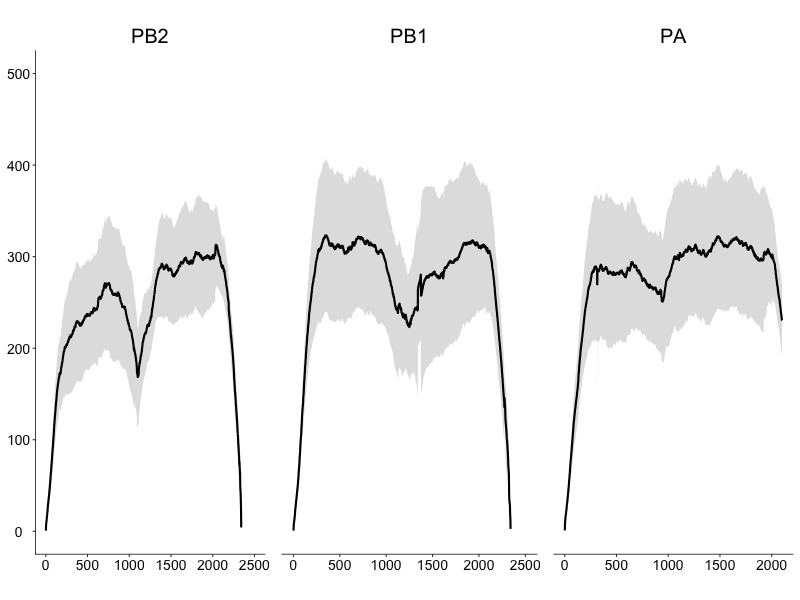

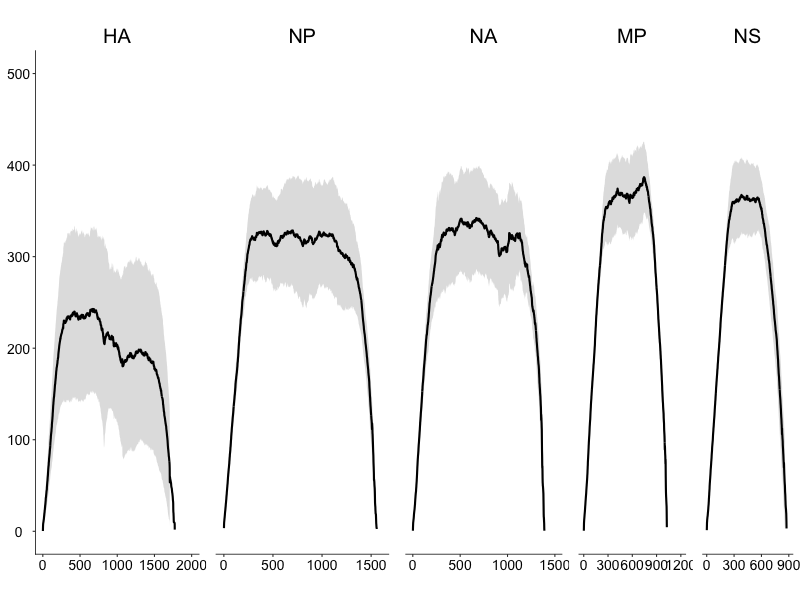

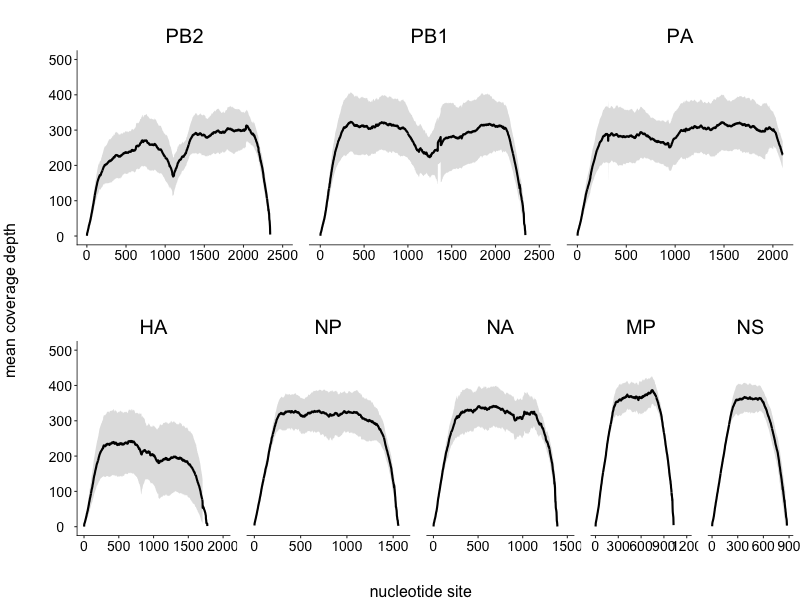

In [14]:
%%R -w 800 -h 600 -u px -i df  # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
require(grid)
library(grid)
require(gridExtra)
library(gridExtra)

df$gene = gsub("H5","HA",df$gene)
df$gene = gsub("N1","NA",df$gene)
df$genef = factor(df$gene, levels=c("PB2","PB1","PA","HA","NP","NA","MP","NS"))

blank_data <- data.frame(genef = c("PB2","PB2","PB1","PB1","PA","PA","HA","HA","NP","NP","NA","NA","MP","MP","NS","NS"), x = c(0,2400,0,2400,0,2300,0,1800,0,1600,0,1500,0,1100,0,900), y = 0)

genes = c('PB2','PB1','PA','HA','NP','NA','MP','NS')
stops = list('PB2'=2500,'PB1'=2500,'PA'=2100,'HA'=2000,'NP'=1600,'NA'=1500,'MP'=1200,'NS'=900)
steps = list('PB2'=500,'PB1'=500,'PA'=500,'HA'=500,'NP'=500,'NA'=500,'MP'=300,'NS'=300)

plots = list()

for (g in genes)
{
    d = df[df$gene == g,]
    stop = stops[[g]]
    step = steps[[g]]
    name = paste(g, "plot",sep = '_')
    
    # set PB2 and NP-specific y-axis aesthetics
    if (g == "PB2"| g == 'HA'){
        y_aesthetics = theme(axis.line.y=element_line(colour="black"))+
        theme(axis.text.y=element_text(hjust=0.5, size=14))+
        theme(axis.title.y=element_text(size=16, vjust=8))
    } else {
        y_aesthetics = theme(axis.line.y=element_blank())+
        theme(axis.ticks.y= element_blank())+
        theme(axis.text.y=element_blank())+
        theme(axis.title.y=element_blank())
    }
        
    p <- ggplot(data=d, aes(x=site, y=mean, group=genef)) + 
        geom_ribbon(aes(x=site, ymin=lower, ymax=upper), fill="grey80", linetype=0, alpha=0.6)+
        geom_line(size=1)+    
        geom_blank(data = blank_data, aes(x = x, y = y))+
        labs(title=g)+
        theme(plot.title = element_text(size=20, hjust=0.5))+
        theme(panel.grid.major.y=element_line(colour=NA))+
        theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
        theme(strip.background = element_rect(colour=NA, fill=NA))+
        theme(strip.text=element_text(size=16))+
        theme(axis.line.x=element_line(colour="black"))+
        y_aesthetics+
        theme(axis.title.x=element_blank())+
        theme(axis.title.y=element_blank())+
        theme(axis.text=element_text(size=14, color="black"))+
        theme(legend.text=element_text(size=16))+
        theme(legend.title=element_text(size=16, face="plain"))+
        theme(panel.margin=unit(1, "lines"))+
        theme(plot.margin=unit(c(1,0.25,1,0.25),"cm"))+    # this sets the plot margins as top, left, bottom, right
        theme(legend.key.size=unit(0.7, "cm"))+
        theme(panel.background=element_rect(fill=NA))+
        theme(legend.key=element_rect(fill=NA))+
        scale_y_continuous(breaks=seq(0,500,100), limits=c(0,500))+
        scale_x_continuous(limits = c(0, stop), breaks=seq(0,stop,step))
        #expand_limits(x = 0)
    
    plots[[name]] <- p
} 
top <- grid.arrange(plots[[1]],plots[[2]],plots[[3]], ncol=3, widths=c(0.34,0.34,0.32))
bottom <- grid.arrange(plots[[4]],plots[[5]],plots[[6]],plots[[7]],plots[[8]], ncol=5, widths=c(0.25,0.23,0.21,0.15,0.13))
p <- grid.arrange(top, bottom, left = textGrob("mean coverage depth\n", gp=gpar(fontsize=16), rot=90), bottom=textGrob("nucleotide site", gp=gpar(fontsize=16)))

ggsave("Fig-S1-coverage-plots.pdf", p, width = 16, height = 6, path="figure-PDFs")
p